Загружаем необходимые библиотеки

In [489]:
%matplotlib inline

In [490]:
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray
import numpy as np

1 Выбираем изображение

In [491]:
img = imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')

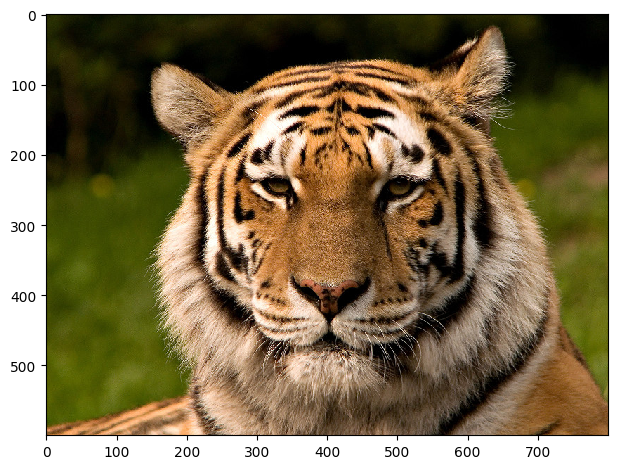

In [492]:
imshow(img)

In [493]:
img_gray = rgb2gray(img)

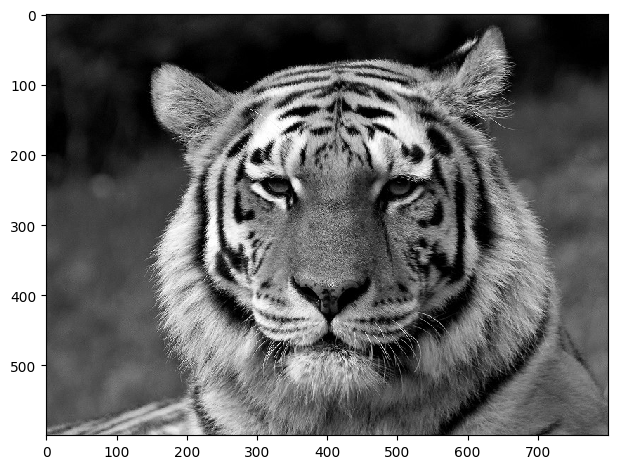

In [494]:
imshow(img_gray)

2 Строим гауссовскую пирамиду

In [495]:
def gauss(sigma, x, y):
   sigma_sq =  sigma ** 2
   return np.exp((-x**2-y**2)/(2*sigma_sq))/(2*np.pi*sigma_sq)

In [496]:
def gauss_kernel(sigma):
    k = round(sigma * 3)
    size = 2 * k + 1
    arr1d = [(i, j) for j in range(k, -k - 1, -1) for i in range(-k, k + 1)]
    gauss1d = [gauss(sigma, el[0], el[1]) for el in arr1d]
    s = sum(gauss1d)
    gauss1d = [el / s for el in gauss1d]
    kernel = np.array(gauss1d).reshape((size, size))
    return kernel

In [497]:
def gauss_padding(img, kernel):
    kernel_pad = np.zeros((img.shape[0], img.shape[1]))
    row = (img.shape[0] - kernel.shape[0]) // 2
    col = (img.shape[1] - kernel.shape[1]) // 2
    kernel_pad[row:-(img.shape[0]-row-kernel.shape[0]), col:-(img.shape[1]-col-kernel.shape[1])] = kernel[:,:]
    return kernel_pad

In [498]:
def gauss_pyramid(img, sigma, n_layers):
    gauss_k = gauss_kernel(sigma)
    gauss_k = gauss_padding(img, gauss_k)
    freq_img = np.fft.fft2(img)
    freq_gauss = np.fft.fft2(np.fft.ifftshift(gauss_k))
    gauss_p = []
    freq_gauss_img = freq_img.copy()
    for i in range(n_layers):
        freq_gauss_img *= freq_gauss
        gauss_p.append(freq_gauss_img)
    return gauss_p

In [499]:
p = gauss_pyramid(img_gray, 1, 5)

In [515]:
for i, el in enumerate(p):
    out_img = np.log(1 + np.abs(np.fft.fftshift(el)))
    imsave("f_out_img_"+ str(i) + ".png", out_img)

Lossy conversion from float64 to uint8. Range [0.0, 12.034693875582631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 12.034693875582631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 12.034693875582631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 12.034693875582631]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 12.034693875582631]. Convert image to uint8 prior to saving to suppress this warning.


In [516]:

for i, el in enumerate(p):
    out_img = np.fft.ifft2(el).real
    imsave("g_out_img_"+ str(i) + ".png", out_img)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


2 Лапласская пирамида

In [517]:
def laplacian_pyramid(img, sigma, n_layers):
    p = gauss_pyramid(img, sigma, n_layers)
    freq_img = np.fft.fft2(img)
    p = [freq_img] + p
    l = []
    for i in range(n_layers):
        l.append(p[i] - p[i+1])
    return l

In [518]:
l = laplacian_pyramid(img_gray, 3, 5)